In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [35]:
tf.__version__

'2.9.2'

In [36]:
(x_tr, y_tr), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

9


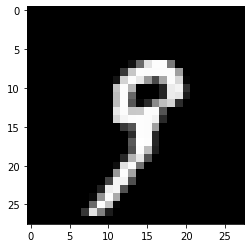

In [37]:
idx = 19
plt.imshow(x_tr[idx], cmap='gray')
print(y_tr[idx])

In [21]:
y_tr

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
model = tf.keras.models.Sequential()

In [18]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

In [23]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [24]:
history = model.fit(x_tr, y_tr, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 7s 3ms/step - loss: 2.6004 - accuracy: 0.8161 - val_loss: 0.5418 - val_accuracy: 0.8906
Epoch 2/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.4683 - accuracy: 0.8907 - val_loss: 0.3667 - val_accuracy: 0.9121
Epoch 3/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.3521 - accuracy: 0.9122 - val_loss: 0.3184 - val_accuracy: 0.9224
Epoch 4/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2929 - accuracy: 0.9248 - val_loss: 0.3096 - val_accuracy: 0.9323
Epoch 5/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2587 - accuracy: 0.9327 - val_loss: 0.2636 - val_accuracy: 0.9384
Epoch 6/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2360 - accuracy: 0.9394 - val_loss: 0.2545 - val_accuracy: 0.9428
Epoch 7/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2220 - accuracy: 0.9430 - val_loss: 0.2351 - val_accuracy:

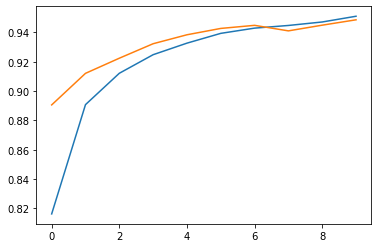

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

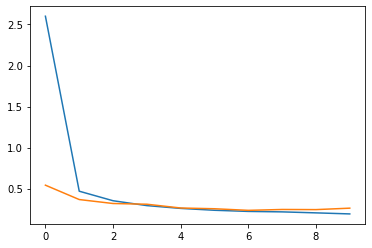

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [32]:
print(model.predict(x_test[356]))
print(y_test[356])

1/1 [==============================] - 0s 24ms/step
[[2.2349790e-26 1.8932760e-24 0.0000000e+00 1.6897604e-13 1.6457433e-37
  1.0000000e+00 3.6157321e-21 2.2752348e-21 2.3710075e-16 5.5911208e-08]]
5


In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.9447


[0.30484870076179504, 0.9447000026702881]

CONVOLUTIONAL NEURAL NETWORKS

In [41]:
x_tr.shape

(60000, 28, 28)

In [42]:
x_tr = x_tr[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [43]:
x_tr.shape

(60000, 28, 28, 1)

In [44]:
model_cnn = tf.keras.models.Sequential()
model_cnn.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(tf.keras.layers.MaxPool2D())
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [46]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                31370     
                                                                 
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_cnn.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [50]:
history_cnn = model_cnn.fit(x_tr, y_tr, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 11s 3ms/step - loss: 0.6628 - accuracy: 0.9259 - val_loss: 0.1272 - val_accuracy: 0.9659
Epoch 2/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1033 - accuracy: 0.9702 - val_loss: 0.0989 - val_accuracy: 0.9740
Epoch 3/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0793 - accuracy: 0.9759 - val_loss: 0.1280 - val_accuracy: 0.9722
Epoch 4/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.1133 - val_accuracy: 0.9721
Epoch 5/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.1159 - val_accuracy: 0.9739
Epoch 6/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.1403 - val_accuracy: 0.9709
Epoch 7/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.1250 - val_accuracy

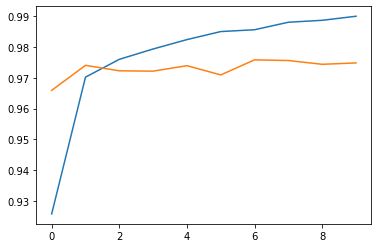

In [51]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

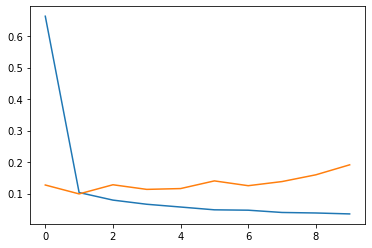

In [53]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])

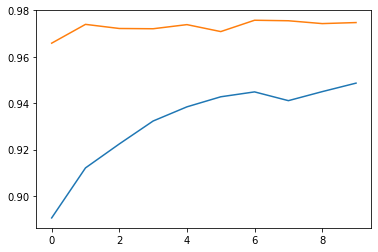

In [55]:
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [62]:
model_cnn2 = tf.keras.models.Sequential()
model_cnn2.add(tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_cnn2.add(tf.keras.layers.MaxPool2D())
model_cnn2.add(tf.keras.layers.Conv2D(8, 3, padding='same', activation='relu'))
model_cnn2.add(tf.keras.layers.MaxPool2D())
model_cnn2.add(tf.keras.layers.Flatten())
model_cnn2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [63]:
model_cnn2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         584       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 392)               0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [64]:
model_cnn2.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [65]:
history_cnn2 = model_cnn2.fit(x_tr, y_tr, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 6s 4ms/step - loss: 1.6847 - accuracy: 0.8497 - val_loss: 0.2021 - val_accuracy: 0.9418
Epoch 2/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.1797 - accuracy: 0.9476 - val_loss: 0.1346 - val_accuracy: 0.9609
Epoch 3/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.1272 - accuracy: 0.9611 - val_loss: 0.1065 - val_accuracy: 0.9699
Epoch 4/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.1025 - accuracy: 0.9686 - val_loss: 0.0867 - val_accuracy: 0.9752
Epoch 5/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0917 - val_accuracy: 0.9740
Epoch 6/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.0749 - accuracy: 0.9760 - val_loss: 0.0944 - val_accuracy: 0.9724
Epoch 7/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.0739 - val_accuracy:

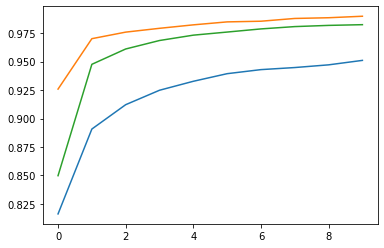

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn2.history['accuracy'])

In [68]:
print(model.evaluate(x_test, y_test))
print(model_cnn.evaluate(x_test, y_test))
print(model_cnn2.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.9447
[0.30484870076179504, 0.9447000026702881]
313/313 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9715
[0.20346052944660187, 0.9714999794960022]
313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9742
[0.09110474586486816, 0.9742000102996826]


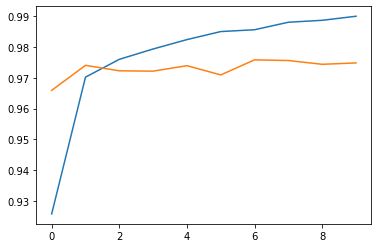

In [72]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [73]:
model_cnn_drop = tf.keras.models.Sequential()
model_cnn_drop.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_cnn_drop.add(tf.keras.layers.MaxPool2D())
model_cnn_drop.add(tf.keras.layers.Flatten())
model_cnn_drop.add(tf.keras.layers.Dropout(0.5))
model_cnn_drop.add(tf.keras.layers.Dense(10, activation='softmax'))

In [74]:
model_cnn_drop.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [76]:
history_cnn_drop = model_cnn_drop.fit(x_tr, y_tr, epochs=10, validation_split=0.15)

Epoch 1/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1334 - accuracy: 0.9599 - val_loss: 0.0780 - val_accuracy: 0.9792
Epoch 2/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1357 - accuracy: 0.9599 - val_loss: 0.0852 - val_accuracy: 0.9781
Epoch 3/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.1310 - accuracy: 0.9615 - val_loss: 0.0745 - val_accuracy: 0.9810
Epoch 4/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.1268 - accuracy: 0.9616 - val_loss: 0.0824 - val_accuracy: 0.9777
Epoch 5/10
1594/1594 [==============================] - 7s 4ms/step - loss: 0.1290 - accuracy: 0.9623 - val_loss: 0.0852 - val_accuracy: 0.9792
Epoch 6/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1316 - accuracy: 0.9613 - val_loss: 0.0761 - val_accuracy: 0.9791
Epoch 7/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.1254 - accuracy: 0.9629 - val_loss: 0.0845 - val_accuracy:

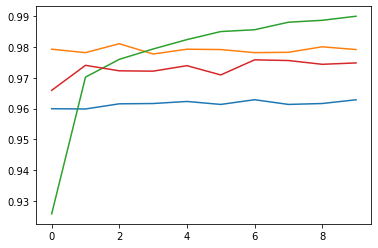

In [79]:
plt.plot(history_cnn_drop.history['accuracy'])
plt.plot(history_cnn_drop.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])

In [78]:
print(model.evaluate(x_test, y_test))
print(model_cnn.evaluate(x_test, y_test))
print(model_cnn2.evaluate(x_test, y_test))
print(model_cnn_drop.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.9447
[0.30484870076179504, 0.9447000026702881]
313/313 [==============================] - 1s 2ms/step - loss: 0.2035 - accuracy: 0.9715
[0.20346052944660187, 0.9714999794960022]
313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9742
[0.09110474586486816, 0.9742000102996826]
313/313 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9790
[0.0894138514995575, 0.9789999723434448]
